# Unit 3 Capstone
Bryan Corder
Mentor: Hoa Tran

## Introduction
For those in sales, one of the ways data science can provide actionable insights is through isolating reasons for customer churn. IBM has a data set on customer churn in the telecoms industry prospective companies can use with their deep learning software Watson. The problem with these unsupervised learning methods is while they provide good accuracy on predicting whether a customer will leave or not, they do not provide much insight in regards to the reasons why customers stay or go. Supervised Learning methods have the ability to provide such insights with their labelled data and through feature selection. The below project aims to gather insights in the IBM churn data set through feature selection and testing these features through various supervised learning models. 

## Data Set
The IBM data contains the following features:
Customer ID = The key for the data.
Gender = Male or Female (Categorical, binary)
Senior Citizen = 0 (No) or 1 (Yes) (Categorical, binary)
Dependents = No or Yes (Categorical, binary)
Tenure = How long they have been a customer (Numerical, discrete)
Phone Service = No or Yes (Categorical, binary)
Multiple Lines = No, Yes, or 'No Phone Service' (Categorical)
Internet Service = DSL, Fiber Optic, or No (Categorical)
Online Security = No internet service, No, or Yes (Categorical)
Online Backup = No internet service, No, or Yes (Categorical)
Device Protection = No internet service, No, or Yes (Categorical) 
Tech Support = No internet service, No, or Yes (Categorical) 
Streaming TV = No internet service, No, or Yes (Categorical) 
Streaming Movies = No internet service, No, or Yes (Categorical)
Contract = Month-to-month, One year, or Two year (Categorical)
Paperless Billing = No or Yes (Categorical, binary)
PaymentMethod = Electronic check, Mailed check, Bank transfer (automatic), or Credit card (automatic) (Categorical)
Monthly Charges = How much the customer pays per month (Numerical, continuous)
Total Charges = How much the customer pays annually (Numerical, continuous)
Churn = Whether the customer stayed (= 0) or left (= 1) (Categorical, binary)


## Data Import and Cleaning

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from datetime import datetime
main_start = datetime.now()
%matplotlib inline

First, let's import our customer churn data set and take a look at how it imports.

In [110]:
main_start = datetime.now()
raw_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

raw_data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [111]:
# Let's take a look at the type of data in each column
data = raw_data.drop(['customerID'], axis=1)
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [112]:
#It appears that Total Charges is coming in as a string, so let's make it numeric
data['TotalCharges'] = data['TotalCharges'].convert_objects(convert_numeric=True)

/Users/bryancorder/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [113]:
# Let's check the data for nulls
null_count = data.isnull().sum()
null_count[null_count>0]

TotalCharges    11
dtype: int64

In [114]:
# There appears to be 11 rows that are missing Total Charges. Since the number is insignificant, let's drop the rows.
data = data.dropna(axis=0)


In [115]:
#Get the values from our columns that are listed as strings
column_names = list(data.columns.values)

#Remove the int/float categories
del column_names[1]
del column_names[3]
del column_names[15]
del column_names[15]

for columns in column_names:
    print(columns,'\n', raw_data[columns].value_counts(), '\n')

gender 
 Male      3555
Female    3488
Name: gender, dtype: int64 

Partner 
 No     3641
Yes    3402
Name: Partner, dtype: int64 

Dependents 
 No     4933
Yes    2110
Name: Dependents, dtype: int64 

PhoneService 
 Yes    6361
No      682
Name: PhoneService, dtype: int64 

MultipleLines 
 No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 

InternetService 
 Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 

OnlineSecurity 
 No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64 

OnlineBackup 
 No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64 

DeviceProtection 
 No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64 

TechSupport 
 No                     3473
Yes                    20

In [116]:
#For the columns that only have 2 values yes or no, let's convert them to 0s and 1s
Yes_No_Columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for feature in Yes_No_Columns:
    data[feature] = np.where(data[feature].values == 'Yes', 1, 0)

#Now let's convert the Males/Females in 0 (Males) and 1 (Females)
data['gender'] = np.where(data.gender.values == 'Female', 1, 0)

#Let's see what we've created
data.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
5,1,0,0,0,8,1,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.50,1
6,0,0,0,1,22,1,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,1,Credit card (automatic),89.10,1949.40,0
7,1,0,0,0,10,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,0,Mailed check,29.75,301.90,0
8,1,0,1,0,28,1,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,1,Electronic check,104.80,3046.05,1
9,0,0,0,1,62,1,No,DSL,Yes,Yes,No,No,No,No,One year,0,Bank transfer (automatic),56.15,3487.95,0


The Dataframe looks nice, but it's hard to gather any insights from the data. Let's use count plots to see if we can pick up insights.

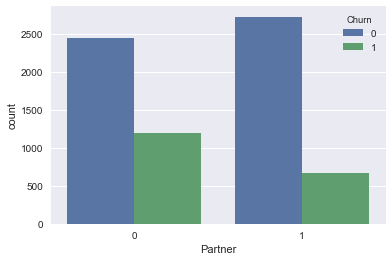

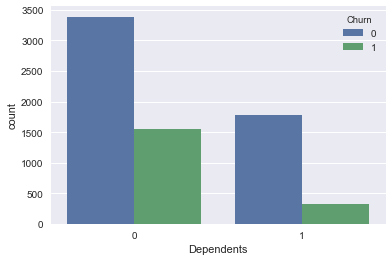

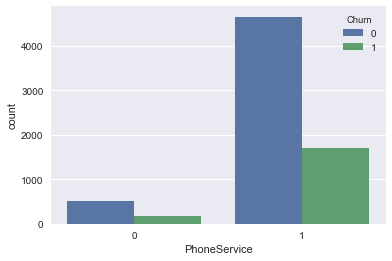

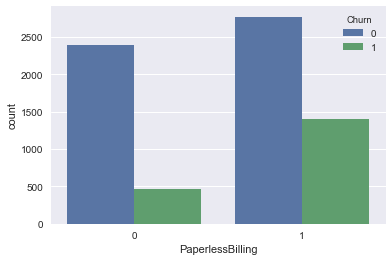

In [117]:
del Yes_No_Columns[4]
for feature in Yes_No_Columns:
    sns.countplot(x=feature, hue='Churn', data=data)
    plt.show()

From these visualizations, it appears that customers in the categories of without partners, without dependents, and who use paperless billing are more likely to leave. It'll be interesting to see if these categories end up in our final model.

Let's do the same for columns with multiple answers.

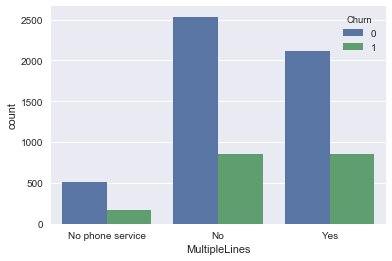

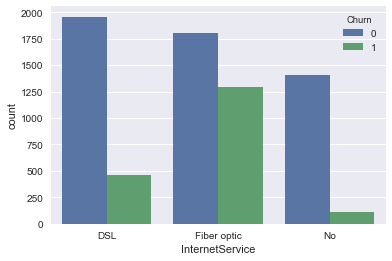

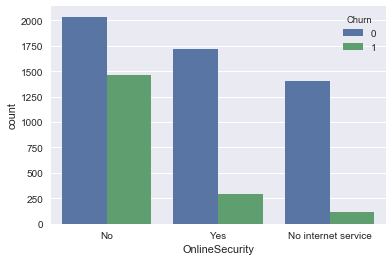

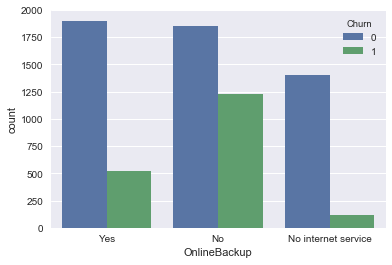

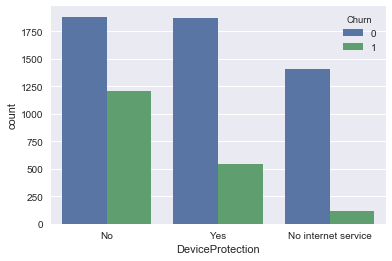

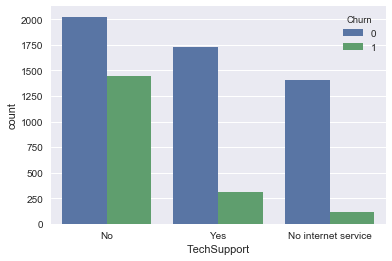

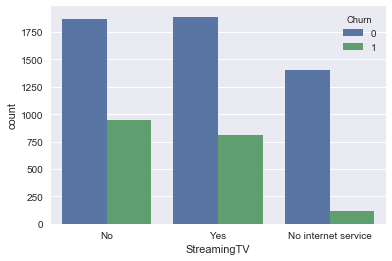

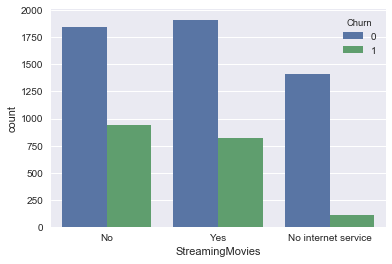

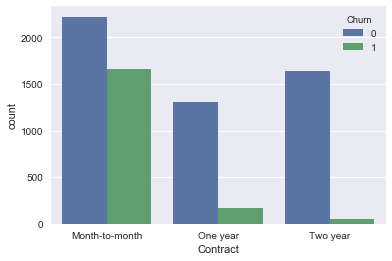

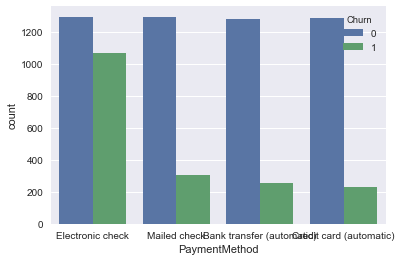

In [118]:
multiple_answers = ['MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaymentMethod']
for feature in multiple_answers:
    sns.countplot(x=feature, hue='Churn', data=data)
    plt.show()

From these visualizations, it appears that people with or without the following services are most likely to leave: Fiber Optic, No online security, No online backup, No device protection, No tech support, Month-to-month payment, and pay with Electronic Check. These categories are certainly ones to continue looking at as we go through the modeling.

In order for the computer to be able to use the features with multiple answers, let's convert them to dummies.

In [119]:
#Let's get dummies for the columns with multiple answers
data = pd.get_dummies(data, columns=multiple_answers)

In [120]:
#Now we can look at our 41 features.
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.495307,0.162400,0.482509,0.298493,32.421786,0.903299,0.592719,64.798208,2283.300441,0.265785,...,0.395478,0.216155,0.388367,0.551052,0.209329,0.239619,0.219283,0.216297,0.336320,0.228100
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.491363,30.085974,2266.771362,0.441782,...,0.488988,0.411650,0.487414,0.497422,0.406858,0.426881,0.413790,0.411748,0.472483,0.419637
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,401.450000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,3794.737500,1.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


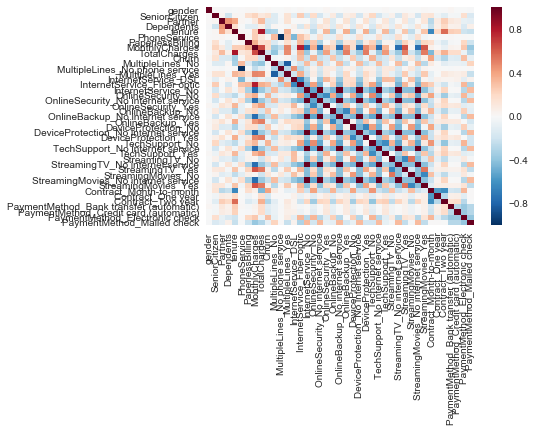

In [121]:
#Check their relationship with a heatmap
sns.heatmap(data.corr())

It appears there is little relationship between our variables outside of the inverse relationship with our dummy variables, which would make sense.

Let's create some models to see which features are most important for predicting churn.

## Build a Model

In [122]:
def basic_test(test):
    #Fit the models
    test.fit(X, y)
    #Generate the score
    print('Accuracy on the data with no feature selection: {}'.format(test.score(X, y)))
    print('\nCross Validation with 5 folds: {}'.format(cross_val_score(test, X, y, cv=5)) )

X = data.drop(['Churn'], 1)
y = data['Churn']

### Basic Models with No Manipulation
First let's try a number of models on the full data set without manipulation to see the accuracy of each model.

In [123]:
lr = LogisticRegression(C=9e9)
basic_test(lr)

Accuracy on the data with no feature selection: 0.8058873720136519

Cross Validation with 5 folds: [ 0.80312722  0.81165601  0.78962331  0.814367    0.80427046]


In [124]:
lr = LogisticRegression(C=1, penalty='l1')
basic_test(lr)
  

Accuracy on the data with no feature selection: 0.8064562002275313

Cross Validation with 5 folds: [ 0.80312722  0.81307747  0.78962331  0.80938834  0.80427046]


In [125]:
lr = LogisticRegression(C=1, penalty='l2')
basic_test(lr)

Accuracy on the data with no feature selection: 0.805745164960182

Cross Validation with 5 folds: [ 0.80312722  0.81236674  0.78962331  0.81507824  0.80498221]


In [126]:
neighbors = KNeighborsClassifier(n_neighbors=9)
basic_test(neighbors)

Accuracy on the data with no feature selection: 0.8114334470989761

Cross Validation with 5 folds: [ 0.77398721  0.78749112  0.77185501  0.77667141  0.78790036]


In [127]:
svc = SVC(C=1, gamma=0.1)
basic_test(svc)

Accuracy on the data with no feature selection: 0.9677189988623436

Cross Validation with 5 folds: [ 0.76190476  0.76972281  0.75479744  0.76386913  0.76654804]


In [128]:
clf = DecisionTreeClassifier()
basic_test(clf)

Accuracy on the data with no feature selection: 0.9974402730375427

Cross Validation with 5 folds: [ 0.72210377  0.74555792  0.71712864  0.71052632  0.73238434]


In [129]:
rfc = RandomForestClassifier()
basic_test(rfc)

Accuracy on the data with no feature selection: 0.9799488054607508

Cross Validation with 5 folds: [ 0.77967306  0.78606965  0.75621891  0.77596017  0.78362989]


In [130]:
clf = GradientBoostingClassifier()
basic_test(clf)

Accuracy on the data with no feature selection: 0.8257963594994312

Cross Validation with 5 folds: [ 0.8137882   0.81094527  0.78109453  0.81223329  0.80498221]


Our best models are scoring fairly well without any manipulation at around 80% accuracy. Let's try to isolate the important features of the 41 and improve our scores.

### Data Manipulation

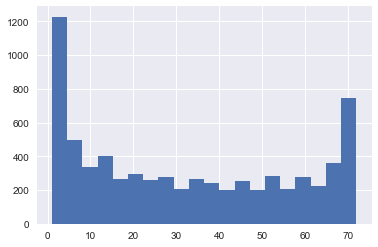

In [131]:
plt.hist(data['tenure'], bins=20)
plt.show()

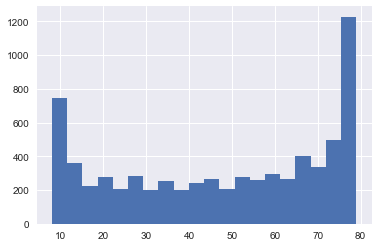

In [132]:
data['tenure_reverse'] = 80 - data['tenure']
plt.hist(data['tenure_reverse'], bins=20)
plt.show()

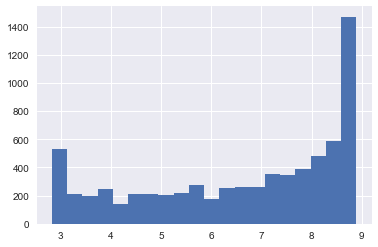

In [133]:
data['tenure_reverse_sqrt'] = data['tenure_reverse'] ** (1/2)
plt.hist(data['tenure_reverse_sqrt'], bins=20)
plt.show()

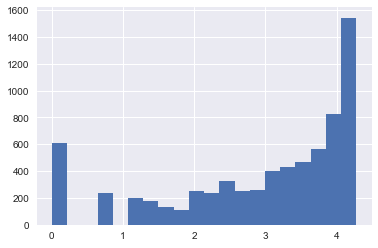

In [134]:
data['tenure_log'] = np.log(data['tenure'])
plt.hist(data['tenure_log'], bins=20)
plt.show()

In [135]:
threshold = 30
data['tenure_binary'] = np.where(data['tenure'] >= threshold, 1, 0)
data['tenure_binary'].value_counts()

0    3558
1    3474
Name: tenure_binary, dtype: int64

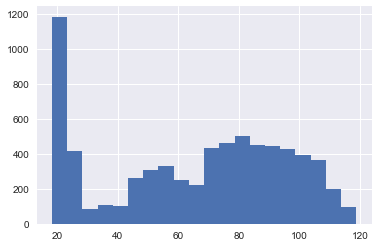

In [136]:
plt.hist(data['MonthlyCharges'], bins=20)
plt.show()

In [137]:
threshold = 50.0
data['expensive'] = np.where(data['MonthlyCharges'] >= threshold, 1, 0)
data['expensive'].value_counts()

1    4744
0    2288
Name: expensive, dtype: int64

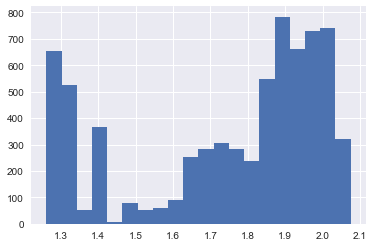

In [138]:
data['MonthlyCharges_log'] = np.log10(data['MonthlyCharges'])
plt.hist(data['MonthlyCharges_log'], bins=20)
plt.show()

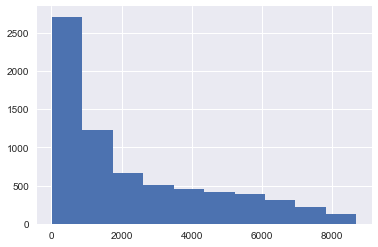

In [139]:
plt.hist(data['TotalCharges'], bins=10)
plt.show()

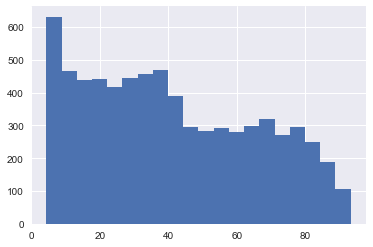

In [140]:
data['TotalCharges_sqrt'] = data['TotalCharges'] ** (1/2)
plt.hist(data['TotalCharges_sqrt'], bins=20)
plt.show()

Now that we have some new features, let's balance our data to improve the performance of our modeling for predictions.

In [141]:
# Create a separate yes and no variable
yes_churn = data[data.Churn == 1]
no_churn = data[data.Churn == 0]

# Use resample to get an equal number of yes and nos in our data
data = resample(no_churn, n_samples=1869)
data = data.append(yes_churn)

# Now we can create our X and Y variables
X = data.drop(['Churn'], 1)
y = data['Churn']

#Make a training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Feature Selection
Principle Components Analysis works in a blackbox fashion, so it won't help us in isolating features important to predicting whether a customer will stay or leave, but let's include it to see if we can improve the performance of the models in predicting by cancelling out the noise of the 41 features.

/Users/bryancorder/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


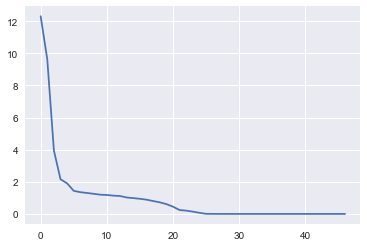

In [142]:
# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(X_train)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

plt.plot(eig_val_cov)
plt.show()

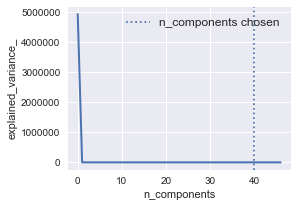

In [143]:
logistic = LogisticRegression()

pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# Plot the PCA spectrum
pca.fit(X_train)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.plot(pca.explained_variance_, linewidth=2)
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

# Prediction
n_components = [10, 20, 30, 40]
Cs = np.logspace(1, 4, 3)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs))
estimator.fit(X_train, y_train)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()

In [144]:
#Set up our first X using PCA
pca = PCA(n_components=4)
X_std_pca = pca.fit_transform(X_train)
X1 = pd.DataFrame(X_std_pca)

#Now for the Test
pca = PCA(n_components=4)
X_std_pca = pca.fit_transform(X_test)
X1_test = pd.DataFrame(X_std_pca)

SK Learn has a powerful tool that allows us to use Cross Validation to isolate the features that are most important in prediction called Recursive Feature Elimination.

In [145]:
start = datetime.now()
#Use Lasso/RFE with Cross Validation to get the best features for our second X
lr = LogisticRegression(C=1, penalty='l1')

#Set up our X,y
X = X_train
y = y_train

#Set up our Recursive Feature Elimination
rfe = RFECV(lr,cv=5) 
fit = rfe.fit(X,y)
result_RFE = pd.DataFrame(list(zip(X.head(0), rfe.ranking_, rfe.support_)),
                          columns=['Features','Ranking','Support'] ) 
print(result_RFE.sort_values('Ranking'))
print('It took the following time to complete this task:', datetime.now() - start)

                                   Features  Ranking  Support
0                                    gender        1     True
32                      StreamingMovies_Yes        1     True
33                  Contract_Month-to-month        1     True
18                          OnlineBackup_No        1     True
35                        Contract_Two year        1     True
36  PaymentMethod_Bank transfer (automatic)        1     True
15                        OnlineSecurity_No        1     True
38           PaymentMethod_Electronic check        1     True
13              InternetService_Fiber optic        1     True
39               PaymentMethod_Mailed check        1     True
29                          StreamingTV_Yes        1     True
40                           tenure_reverse        1     True
9                          MultipleLines_No        1     True
42                               tenure_log        1     True
6                          PaperlessBilling        1     True
43      

In [146]:
true_values = result_RFE[result_RFE.Support == True]
feature_list = []
for g in true_values['Features']:
    feature_list.append(g)

In [147]:
X2 = X_train[feature_list]
X2_test = X_test[feature_list]

Let's use Random Forest to select features

In [148]:
# Let's use Random Forest to select features.
start = datetime.now()
X = X_train
y = y_train
clf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
df2 = X.columns.get_values()
feat_labels = df2.tolist()

# Train the classifier
clf.fit(X, y)
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
for feature in zip(X, clf.feature_importances_):
    print(feature)

print('It took the following time to complete this task:', datetime.now() - start)

('gender', 0.016672146432540464)
('SeniorCitizen', 0.011824965569025136)
('Partner', 0.013868789622807767)
('Dependents', 0.013382114520838673)
('tenure', 0.058896301551876695)
('PhoneService', 0.0025282228060670331)
('PaperlessBilling', 0.016284459003862137)
('MonthlyCharges', 0.075437507274889598)
('TotalCharges', 0.074803536802065251)
('MultipleLines_No', 0.0088458008756605137)
('MultipleLines_No phone service', 0.0024991907777462551)
('MultipleLines_Yes', 0.0085623276683282536)
('InternetService_DSL', 0.0080671775124398614)
('InternetService_Fiber optic', 0.01832681502171752)
('InternetService_No', 0.0040406447199350919)
('OnlineSecurity_No', 0.028274702293568134)
('OnlineSecurity_No internet service', 0.0034196884163134661)
('OnlineSecurity_Yes', 0.0088316224436979784)
('OnlineBackup_No', 0.013046532947159772)
('OnlineBackup_No internet service', 0.0040828096427874948)
('OnlineBackup_Yes', 0.008312122632899396)
('DeviceProtection_No', 0.010394087768917641)
('DeviceProtection_No in

This is very insightful because we can use the "feature_importances_" to see just how important each feature is in predicting whether a customer will leave or not.

In [149]:
start = datetime.now()

# Retrieve the most important features by using SelectFromModel with a given threshold 
sfm = SelectFromModel(clf, threshold=0.03)
rfcfeature_list =[]
# Train the selector
sfm.fit(X, y)
for feature_list_index in sfm.get_support(indices=True):
    rfcfeature_list.append(feat_labels[feature_list_index])
    print(feat_labels[feature_list_index])

X3 = X_train[rfcfeature_list]
X3_test = X_test[rfcfeature_list]
     
print('Number of features in this list: {}'.format(len(rfcfeature_list)))
print('It took the following time to complete this task:', datetime.now() - start)

tenure
MonthlyCharges
TotalCharges
TechSupport_No
Contract_Month-to-month
tenure_reverse
tenure_reverse_sqrt
tenure_log
MonthlyCharges_log
TotalCharges_sqrt
Number of features in this list: 10
It took the following time to complete this task: 0:00:03.114029


### Run Models
First let's create a dataframe to store the results.

In [150]:
#Make a list to store our results for a comparison at the end
results = pd.DataFrame(index=range(24))
results['Model'] = ['Logistic Regression',
                    'Logistic Regression',
                    'Logistic Regression',
                    'Lasso Regression',
                    'Lasso Regression',
                    'Lasso Regression',
                    'Ridge Regression',
                    'Ridge Regression',
                    'Ridge Regression',
                    'KNN', 'KNN', 'KNN',
                    'SVC', 'SVC', 'SVC',
                    'Decision Tree', 'Decision Tree', 'Decision Tree',
                    'Random Forest',
                    'Random Forest',
                    'Random Forest',
                    'Gradient Booster',
                    'Gradient Booster',
                    'Gradient Booster',
                    ]
results['Feature Selection'] = ['PCA', 'RFECV', 'Random Forest',
                               'PCA', 'RFECV', 'Random Forest',
                               'PCA', 'RFECV', 'Random Forest',
                               'PCA', 'RFECV', 'Random Forest',
                                'PCA', 'RFECV', 'Random Forest',
                               'PCA', 'RFECV', 'Random Forest',
                               'PCA', 'RFECV', 'Random Forest',
                               'PCA', 'RFECV', 'Random Forest']


Train_Score = []
Test_Score = []
Cross_Validation = []
fold1 = []
fold2 = []
fold3 = []
fold4 = []
fold5 = []

Now let's create a testing function so that all we have to do is set the test and its parameters to run the test and store the results.

In [151]:
#Create a testing function that will fit the test with PCA and our selected features from both RFECV and Random Forest
def testing_func(test):
    scores=[]
    models = [[X1, y], [X1_test, y_test], [X2, y],[X2_test, y_test], [X3, y], [X3_test, y_test]]
    for x in models:
        test.fit(x[0], x[1])
        scores.append(test.score(x[0], x[1]))
 
    Train_Score.append(scores[0])
    Train_Score.append(scores[2])
    Train_Score.append(scores[4])
    Test_Score.append(scores[1])
    Test_Score.append(scores[3])
    Test_Score.append(scores[5])

    df=pd.DataFrame(scores, columns=['Accuracy'], index=['PCA Training', 'PCA Test', 'RFECV Training', 'RFECV Test', 
                                                         'Random Forest Training' , 'Random Forest Test'])
    print(df)
    
    exes = [[X1, 'PCA'], [X2, 'RFECV'], [X3, 'Random Forest']]
    for x in exes:
        Cross_Validation0 = cross_val_score(test, x[0], y, cv=5)
        Cross_Validation.append(Cross_Validation0)
        fold1.append(Cross_Validation0[0])
        fold2.append(Cross_Validation0[1])
        fold3.append(Cross_Validation0[2])
        fold4.append(Cross_Validation0[3])
        fold5.append(Cross_Validation0[4])
        print('\nCross Validation Score with 5 folds with {}:\n{}'.format(x[1], Cross_Validation0))
    

In [152]:
start = datetime.now()
#Let's compare our features in various models starting with Logistic Regression
lr = LogisticRegression(C=9e9)
testing_func(lr)

print('It took the following time to complete this task:', datetime.now() - start)

                        Accuracy
PCA Training            0.733626
PCA Test                0.735818
RFECV Training          0.785942
RFECV Test              0.781199
Random Forest Training  0.766374
Random Forest Test      0.769854

Cross Validation Score with 5 folds with PCA:
[ 0.73705179  0.76693227  0.706       0.718       0.744     ]

Cross Validation Score with 5 folds with RFECV:
[ 0.75896414  0.80079681  0.752       0.766       0.814     ]

Cross Validation Score with 5 folds with Random Forest:
[ 0.73904382  0.79482072  0.744       0.774       0.774     ]
It took the following time to complete this task: 0:00:00.290259


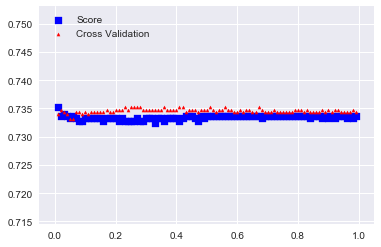

In [153]:
numb = np.arange(0.01, 1, 0.01)
yl = []
cl = []
for g in numb:
    lr = LogisticRegression(C=g, penalty='l1')
    lr.fit(X1, y)
    yl.append(lr.score(X1, y))
    cl.append(np.mean(cross_val_score(lr, X1, y, cv=5)))

fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.xlabel('Lambda')
plt.ylabel('Score')
ax1.scatter(x=numb, y=yl, c='b', marker="s", label='Score')
ax1.scatter(x=numb, y=cl, s=10, c='r', marker="^", label='Cross Validation')
plt.legend(loc='upper left');
plt.show()

In [154]:
start = datetime.now()
#Let's pop those into the model
lr = LogisticRegression(C=1, penalty='l1')
testing_func(lr)

print('It took the following time to complete this task:', datetime.now() - start)

                        Accuracy
PCA Training            0.733626
PCA Test                0.737439
RFECV Training          0.784744
RFECV Test              0.780389
Random Forest Training  0.766374
Random Forest Test      0.769044

Cross Validation Score with 5 folds with PCA:
[ 0.73505976  0.76693227  0.706       0.72        0.744     ]

Cross Validation Score with 5 folds with RFECV:
[ 0.75896414  0.80677291  0.754       0.762       0.816     ]

Cross Validation Score with 5 folds with Random Forest:
[ 0.73705179  0.79083665  0.748       0.772       0.774     ]
It took the following time to complete this task: 0:00:05.384002


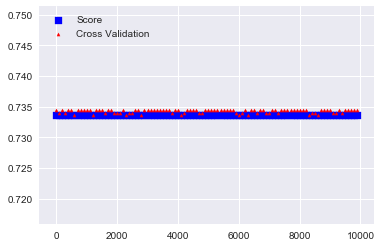

In [155]:
numb = np.arange(1, 10000, 100)

yr = []
cr = []
for g in numb:
    lr = LogisticRegression(C=g, penalty='l2')
    lr.fit(X1, y)
    yr.append(lr.score(X1, y))
    cr.append(np.mean(cross_val_score(lr, X1, y, cv=5)))

fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.xlabel('Lambda')
plt.ylabel('Score')
ax1.scatter(x=numb, y=yr, c='b', marker="s", label='Score')
ax1.scatter(x=numb, y=cr, s=10, c='r', marker="^", label='Cross Validation')
plt.legend(loc='upper left');
plt.show()

In [156]:
start = datetime.now()
#Let's compare our features in various models starting with Logistic Regression
lr = LogisticRegression(C=1, penalty='l2')
testing_func(lr)

print('It took the following time to complete this task:', datetime.now() - start)

                        Accuracy
PCA Training            0.733626
PCA Test                0.735818
RFECV Training          0.785543
RFECV Test              0.780389
Random Forest Training  0.766773
Random Forest Test      0.769044

Cross Validation Score with 5 folds with PCA:
[ 0.73705179  0.76693227  0.706       0.718       0.744     ]

Cross Validation Score with 5 folds with RFECV:
[ 0.75896414  0.80478088  0.756       0.762       0.816     ]

Cross Validation Score with 5 folds with Random Forest:
[ 0.73904382  0.79083665  0.748       0.77        0.77      ]
It took the following time to complete this task: 0:00:00.247225


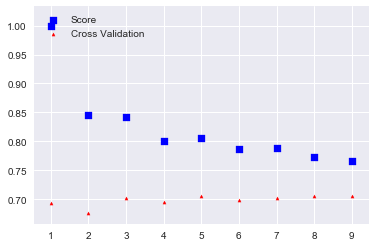

It took the following time to complete this task: 0:00:00.549923


In [157]:
numb = np.arange(1, 10, 1)
start = datetime.now()
yn = []
cv = []
for g in numb:
    neighbors = KNeighborsClassifier(n_neighbors=g)
    neighbors.fit(X1, y)
    yn.append(neighbors.score(X1, y))
    cv.append(np.mean(cross_val_score(neighbors, X1, y, cv=5)))
    
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
ax1.scatter(x=numb, y=yn, c='b', marker="s", label='Score')
ax1.scatter(x=numb, y=cv, s=10, c='r', marker="^", label='Cross Validation')
plt.legend(loc='upper left');
plt.show()

print('It took the following time to complete this task:', datetime.now() - start)

In [158]:
start = datetime.now()
neighbors = KNeighborsClassifier(n_neighbors=9)
testing_func(neighbors)

print('It took the following time to complete this task:', datetime.now() - start)

                        Accuracy
PCA Training            0.766374
PCA Test                0.767423
RFECV Training          0.799920
RFECV Test              0.802269
Random Forest Training  0.766773
Random Forest Test      0.767423

Cross Validation Score with 5 folds with PCA:
[ 0.69920319  0.71513944  0.698       0.694       0.722     ]

Cross Validation Score with 5 folds with RFECV:
[ 0.71912351  0.7689243   0.71        0.75        0.786     ]

Cross Validation Score with 5 folds with Random Forest:
[ 0.69721116  0.71513944  0.698       0.694       0.724     ]
It took the following time to complete this task: 0:00:00.224544


In [159]:
svc = SVC()
parameters = {'C':[1,2,3,4,5], 'gamma': 
              [0.01,0.02,0.03,0.04,0.05,0.10]}
grid = GridSearchCV(svc, parameters)
grid.fit(X1, y)
predicted = grid.predict(X1_test)
print("The best parameters are {} with a score of %{}".format(grid.best_params_, grid.best_score_))

#Put those parameters in a dictionary to call.
parameters = grid.best_params_

The best parameters are {'C': 1, 'gamma': 0.01} with a score of %0.7056709265175719


In [160]:
start = datetime.now()
#Now let's model with SVM
svc = SVC(C=parameters['C'], gamma=parameters['gamma'])
testing_func(svc)

print('It took the following time to complete this task:', datetime.now() - start)

                        Accuracy
PCA Training            0.912540
PCA Test                0.935170
RFECV Training          0.772364
RFECV Test              0.762561
Random Forest Training  0.912939
Random Forest Test      0.935170

Cross Validation Score with 5 folds with PCA:
[ 0.71713147  0.75697211  0.724       0.672       0.69      ]

Cross Validation Score with 5 folds with RFECV:
[ 0.73505976  0.76693227  0.722       0.772       0.77      ]

Cross Validation Score with 5 folds with Random Forest:
[ 0.71713147  0.75697211  0.724       0.672       0.692     ]
It took the following time to complete this task: 0:00:03.525284


In [161]:
start = datetime.now()
clf = DecisionTreeClassifier()
parameters = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}
grid = GridSearchCV(clf, parameters)
grid.fit(X1, y)
predicted = grid.predict(X1_test)
print("The best parameters are {} with a score of %{}".format(grid.best_params_, grid.best_score_))

#Put those parameters in a dictionary to call.
parameters = grid.best_params_

print('It took the following time to complete this task:', datetime.now() - start)

The best parameters are {'max_depth': 3} with a score of %0.7312300319488818
It took the following time to complete this task: 0:00:00.281283


In [162]:
start = datetime.now()
clf = DecisionTreeClassifier(max_depth=parameters['max_depth'], 
                             random_state=42)
testing_func(clf)

print('It took the following time to complete this task:', datetime.now() - start)

                        Accuracy
PCA Training            0.743610
PCA Test                0.761750
RFECV Training          0.755192
RFECV Test              0.767423
Random Forest Training  0.753994
Random Forest Test      0.767423

Cross Validation Score with 5 folds with PCA:
[ 0.73306773  0.74302789  0.706       0.724       0.752     ]

Cross Validation Score with 5 folds with RFECV:
[ 0.73505976  0.76095618  0.736       0.746       0.764     ]

Cross Validation Score with 5 folds with Random Forest:
[ 0.72908367  0.76095618  0.722       0.744       0.768     ]
It took the following time to complete this task: 0:00:00.143474


In [163]:
start = datetime.now()
rfc = RandomForestClassifier()
parameters = {'n_estimators':[10, 100, 1000, 10000], 'max_depth':[2,4,6,8,10]}
grid = GridSearchCV(rfc, parameters)
grid.fit(X1, y)
predicted = grid.predict(X1_test)
print("The best parameters are {} with a score of %{}".format(grid.best_params_, grid.best_score_))

#Put those parameters in a dictionary to call.
parameters = grid.best_params_
print('It took the following time to complete this task:', datetime.now() - start)

The best parameters are {'max_depth': 8, 'n_estimators': 100} with a score of %0.7496006389776357
It took the following time to complete this task: 0:08:04.365694


In [164]:
start = datetime.now()
#Now let's model with Random Forest
rfc = RandomForestClassifier(n_estimators=parameters['n_estimators'], criterion='gini', 
                             max_depth=parameters['max_depth'], min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                             max_leaf_nodes=2, min_impurity_decrease=0.0, min_impurity_split=None, 
                             bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, 
                             warm_start=False, class_weight=None)

testing_func(rfc)

print('It took the following time to complete this task:', datetime.now() - start)

                        Accuracy
PCA Training            0.730831
PCA Test                0.706645
RFECV Training          0.751597
RFECV Test              0.736629
Random Forest Training  0.734026
Random Forest Test      0.734198

Cross Validation Score with 5 folds with PCA:
[ 0.6752988   0.69920319  0.686       0.668       0.712     ]

Cross Validation Score with 5 folds with RFECV:
[ 0.74501992  0.78286853  0.724       0.736       0.74      ]

Cross Validation Score with 5 folds with Random Forest:
[ 0.7250996   0.77290837  0.69        0.734       0.74      ]
It took the following time to complete this task: 0:00:03.943438


In [165]:
start = datetime.now()
clf = GradientBoostingClassifier()
parameters = {'n_estimators':[1, 10, 100], 'learning_rate': [0.1, 0.25, 0.5, 0.75, 1.0],
              'max_depth':[2,4,6,8,10]}
grid = GridSearchCV(clf, parameters)
grid.fit(X1, y)
predicted = grid.predict(X1_test)
print("The best parameters are {} with a score of %{}".format(grid.best_params_, grid.best_score_))

#Put those parameters in a dictionary to call.
parameters = grid.best_params_
print('It took the following time to complete this task:', datetime.now() - start)

The best parameters are {'learning_rate': 0.75, 'max_depth': 2, 'n_estimators': 10} with a score of %0.7440095846645367
It took the following time to complete this task: 0:00:24.125712


In [166]:
start = datetime.now()
#Now let's model with Gradient Boosting
clf = GradientBoostingClassifier(loss='exponential', learning_rate=parameters['learning_rate'], 
                                 n_estimators=parameters['n_estimators'], subsample=0.75, 
                                 criterion='friedman_mse', min_samples_split=4, min_samples_leaf=1, 
                                 min_weight_fraction_leaf=0.0, max_depth=parameters['max_depth'])

testing_func(clf)

print('It took the following time to complete this task:', datetime.now() - start)

                        Accuracy
PCA Training            0.755591
PCA Test                0.764992
RFECV Training          0.780751
RFECV Test              0.779579
Random Forest Training  0.773962
Random Forest Test      0.791734

Cross Validation Score with 5 folds with PCA:
[ 0.73306773  0.76095618  0.706       0.726       0.714     ]

Cross Validation Score with 5 folds with RFECV:
[ 0.76095618  0.78884462  0.75        0.758       0.792     ]

Cross Validation Score with 5 folds with Random Forest:
[ 0.71912351  0.79482072  0.74        0.76        0.786     ]
It took the following time to complete this task: 0:00:00.345133


In [167]:

results2 = pd.DataFrame({'Train Score': Train_Score, 'Test Score': Test_Score, 'CV Fold 1': fold1,
                            'CV Fold 2': fold2, 'CV Fold 3': fold3, 'CV Fold 4': fold4, 'CV Fold 5': fold5})
results2['CV Mean'] = (results2['CV Fold 1'] + results2['CV Fold 2'] + results2['CV Fold 3'] + results2['CV Fold 4'] +
                       results2['CV Fold 5']) / 5
results = pd.concat([results, results2], axis=1)

results.head(24)

,Model,Feature Selection,CV Fold 1,CV Fold 2,CV Fold 3,CV Fold 4,CV Fold 5,Test Score,Train Score,CV Mean
0,Logistic Regression,PCA,0.737052,0.766932,0.706,0.718,0.744,0.735818,0.733626,0.734397
1,Logistic Regression,RFECV,0.758964,0.800797,0.752,0.766,0.814,0.781199,0.785942,0.778352
2,Logistic Regression,Random Forest,0.739044,0.794821,0.744,0.774,0.774,0.769854,0.766374,0.765173
3,Lasso Regression,PCA,0.735060,0.766932,0.706,0.720,0.744,0.737439,0.733626,0.734398
4,Lasso Regression,RFECV,0.758964,0.806773,0.754,0.762,0.816,0.780389,0.784744,0.779547
5,Lasso Regression,Random Forest,0.737052,0.790837,0.748,0.772,0.774,0.769044,0.766374,0.764378
6,Ridge Regression,PCA,0.737052,0.766932,0.706,0.718,0.744,0.735818,0.733626,0.734397
7,Ridge Regression,RFECV,0.758964,0.804781,0.756,0.762,0.816,0.780389,0.785543,0.779549
8,Ridge Regression,Random Forest,0.739044,0.790837,0.748,0.770,0.770,0.769044,0.766773,0.763576
9,KNN,PCA,0.699203,0.715139,0.698,0.694,0.722,0.767423,0.766374,0.705669


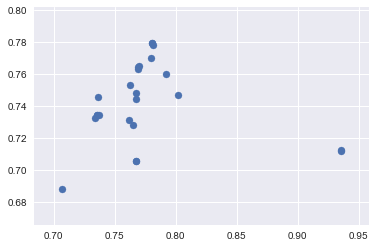

In [168]:
x = results['Test Score']
y = results['CV Mean']
plt.xlabel('Test Score')
plt.ylabel('Mean of Cross Validation Results')
plt.scatter(x, y)
plt.show()

In [169]:
results.describe()

,CV Fold 1,CV Fold 2,CV Fold 3,CV Fold 4,CV Fold 5,Test Score,Train Score,CV Mean
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,0.730910,0.768094,0.723167,0.733833,0.756167,0.776641,0.773629,0.742434
std,0.020534,0.028312,0.021964,0.033781,0.036236,0.053338,0.046976,0.025404
min,0.675299,0.699203,0.686000,0.668000,0.690000,0.706645,0.730831,0.688100
25%,0.719124,0.759960,0.706000,0.718000,0.736000,0.755673,0.749601,0.730716
50%,0.735060,0.766932,0.723000,0.740000,0.758000,0.767423,0.766374,0.745193
75%,0.739044,0.790837,0.745000,0.762000,0.777000,0.780389,0.781749,0.763776
max,0.760956,0.806773,0.756000,0.774000,0.816000,0.935170,0.912939,0.779549
